In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

base_paths = ["constant", "cos", "fast_cos", "parabolic", "skewed_parabolic"]
global_order = 35

# Functions

## Making Gifs

In [2]:
for basis in ['k', 'z']:
    paths = [(path + "/{}_basis/".format(basis)) for path in base_paths]
        
    for j in range(len(paths)):
        path = paths[j]
        gif = path + "{}gif.gif".format(basis)
        imgs = []

        if not os.path.exists(gif):
            print("### creating " + gif + " ###")
            for k in range(global_order + 1):
                file = path + "{}{}.png".format(basis, k)
                imgs.append(file)

            frames = [Image.open(image) for image in imgs]
            frame1 = frames[0]
            frame1.save(gif, format = "GIF", append_images = frames,
                 save_all = True, duration = 200, loop = 0)
        else:
            print("!!! " + gif + " already exists !!!")

!!! constant/k_basis/kgif.gif already exists !!!
!!! cos/k_basis/kgif.gif already exists !!!
!!! fast_cos/k_basis/kgif.gif already exists !!!
!!! parabolic/k_basis/kgif.gif already exists !!!
!!! skewed_parabolic/k_basis/kgif.gif already exists !!!
!!! constant/z_basis/zgif.gif already exists !!!
!!! cos/z_basis/zgif.gif already exists !!!
!!! fast_cos/z_basis/zgif.gif already exists !!!
!!! parabolic/z_basis/zgif.gif already exists !!!
!!! skewed_parabolic/z_basis/zgif.gif already exists !!!


## Importing Data

In [3]:
# building data dictionaries
## building c dictionary
## cs[k or z][function][n][m]
cks = {}
czs = {}
cs = {"k": cks, "z": czs}

for path in base_paths:
    skeleton = {}
    for n in range (global_order + 1):
        n_dict = {}
        for m in np.arange(-n, n + 1, 2):
            n_dict[m] = 0
        skeleton[n] = n_dict
    cks[path] = skeleton
    czs[path] = skeleton

## building error dictionary
## errs[l2 or linf][z or k][function]
l2ks = {}
l2zs = {}
l2s = {"k": l2ks, "z": l2zs}

linfks = {}
linfzs = {}
linfs = {"k": linfks, "z": linfzs}

errs = {"l2": l2s, "linf": linfs}
errs["linf"]["k"]

for path in base_paths:
    errs["l2"]["k"][path] = {}
    errs["l2"]["z"][path] = {}
    errs["linf"]["k"][path] = {}
    errs["linf"]["z"][path] = {}

In [4]:
# importing data
## importing cks
for basis in ["z", "k"]:
    for path in base_paths:
        file = path + "/c{}s.txt".format(basis)
        with open(file) as f:
            reader = csv.reader(f)
            for row in reader:
                n, m, c = int(row[0]), int(row[1]), float(row[2])
                cs['k'][path][n][m] = c # issue is in this line !!! maybe in the dictionary setup

## importing errs
for err_type in ["l2", "linf"]:
    for basis in ["k", "z"]:
        for path in base_paths:
            file = path + "/{}{}.txt".format(err_type, basis)
            with open(file) as f:
                reader = csv.reader(f)
                order = 0
                for row in reader:
                    errs[err_type][basis][path][order] = float(row[0])
                    order += 1

# Plotting

## Functions

In [5]:
def plot_cs(function, show_difference = False):
    function_cks = []
    function_czs = []

    for n in range(36):
        for m in np.arange(-n, n + 1, 2):
            function_cks.append(cs["k"][function][n][m])
            function_czs.append(cs["z"][function][n][m])
    
    if show_difference:
        diff = []
        for i in range(len(function_cks)):
            diff.append(function_cks[i] - function_czs[i])
        plt.plot(diff, label="difference")
    
    for boo in [False, True]:
        plt.plot(function_cks, label="ck")
        plt.plot(function_czs, label="cz")
    
        if boo:
            plt.title("{} Coefficeint Comparision, w/ Order Marking".format(function))
            sum = 0
            for i in range(35 + 1):
                sum += i + 1
                plt.axvline(sum, ls=(0,(5,3)), color = "k")
        else:
            plt.title("{} Coefficeint Comparision".format(function))
        
        plt.legend()
        plt.ylabel("Coefficent Value")
        plt.xlabel("Zernike Sub-order")
        plt.show()

In [6]:
def plot_errors(function, show_log = True, show_l2 = True, show_linf = True):
    function_l2k = []
    function_l2z = []
    
    function_linfk = []
    function_linfz = []
    
    for n in range(global_order + 1):
        function_l2k.append(errs["l2"]["k"][function][n])
        function_l2z.append(errs["l2"]["z"][function][n])
        function_linfk.append(errs["linf"]["k"][function][n])
        function_linfz.append(errs["linf"]["z"][function][n])
    
    def plotter(data1, data2, title = '', show_log = False):
        plt.plot(data1, label="K")
        plt.plot(data2, label="Z")
        if show_log:
            plt.yscale("log")
            plt.ylabel("log Relative Error")
        else:
            plt.ylabel("Relative Error")
        
        plt.title(title)
        plt.xlabel("Zernike Order")
        plt.legend()
        plt.show()
    
    if show_l2:
        plotter(function_l2k, function_l2z, "L$^2$ Relative Error")
        if show_log:
            plotter(function_l2k, function_l2z, "L$^2$ Relative Error", True)
    
    if show_linf:
        plotter(function_linfk, function_linfz, "L$^\infty$ Relative Error")
        if show_log:
            plotter(function_linfk, function_linfz, "L$^\infty$ Relative Error", True)

## Constant

### Normalizing Coefficient

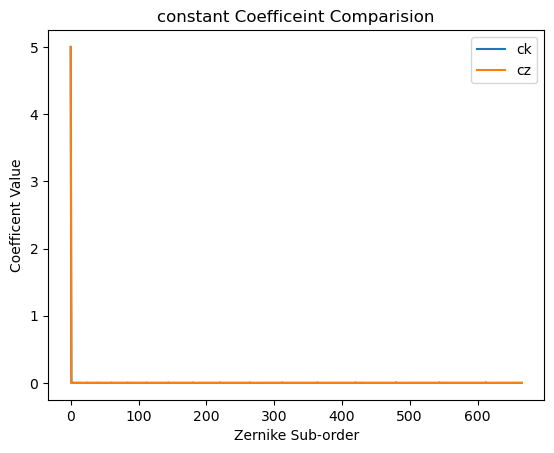

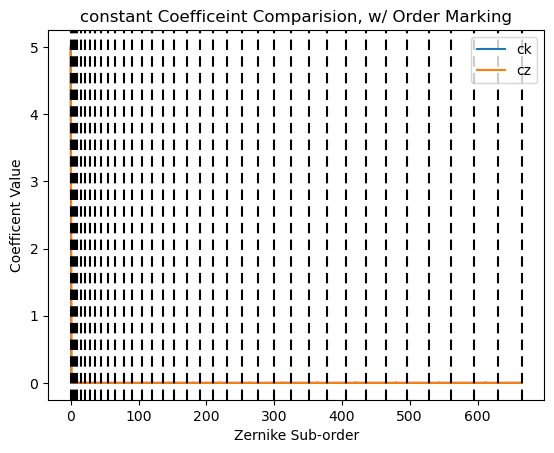

In [7]:
plot_cs("constant")

### Errors

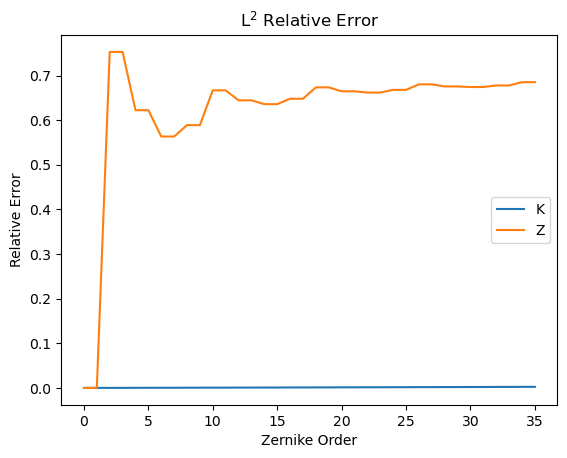

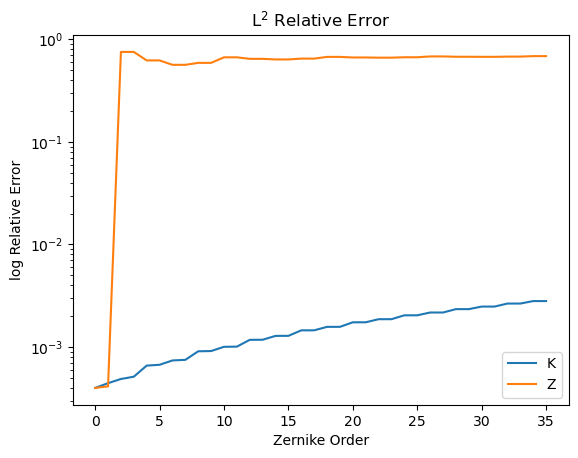

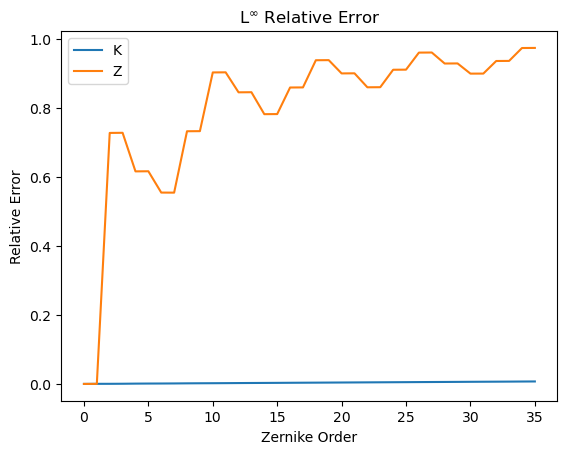

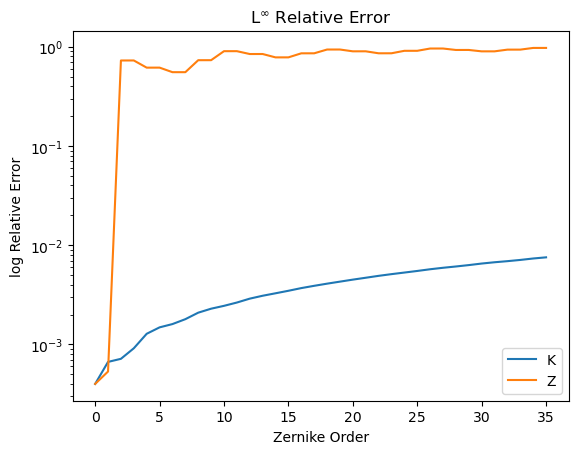

In [8]:
plot_errors("constant")

## Parabolic

### Normalizing Coefficient

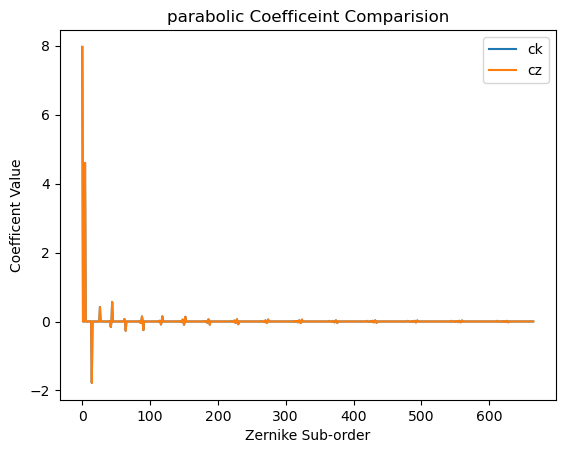

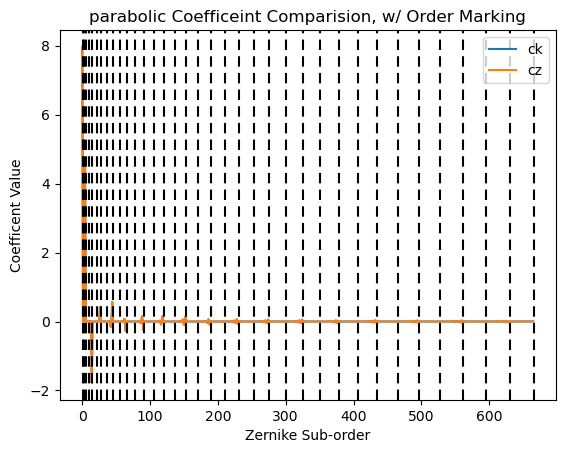

In [9]:
plot_cs("parabolic")

### Errors

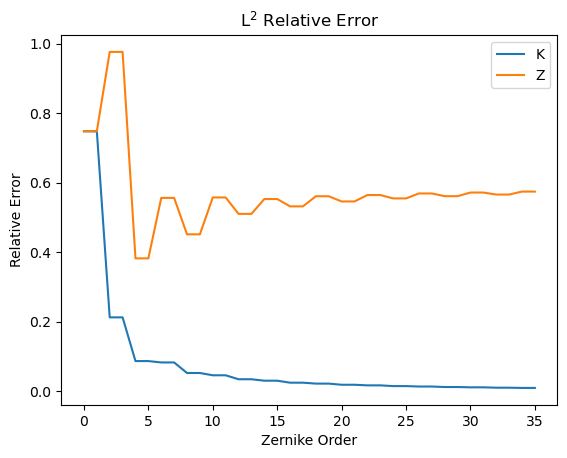

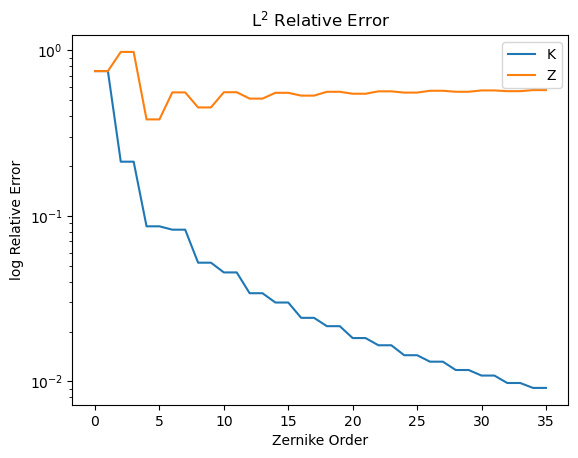

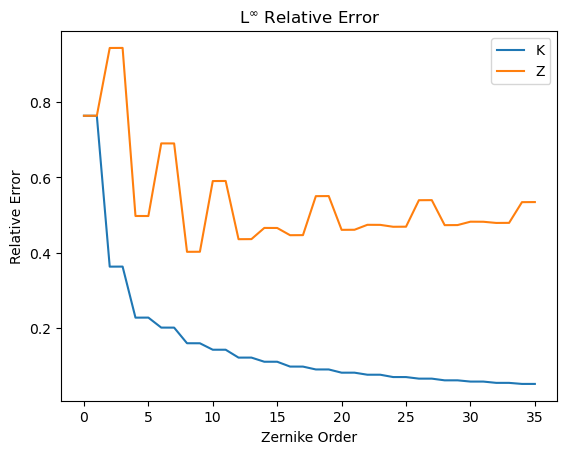

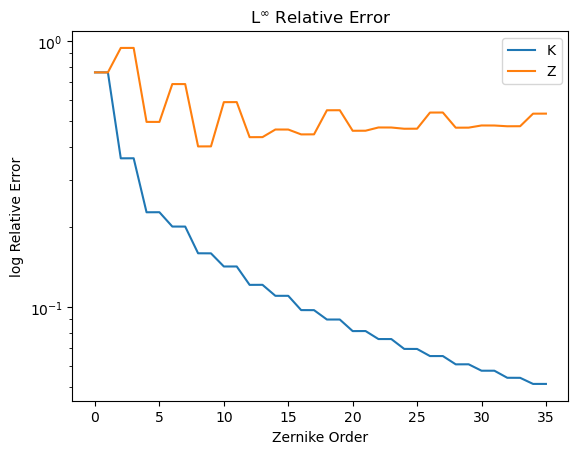

In [10]:
plot_errors("parabolic")

## Skewed Parabolic

### Normalizing Coefficient

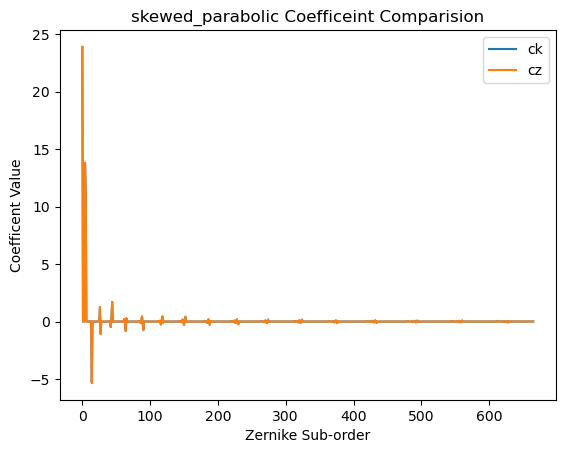

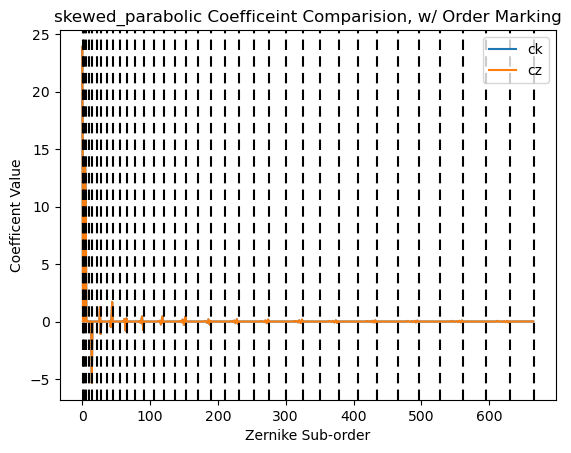

In [11]:
plot_cs("skewed_parabolic")

### Errors

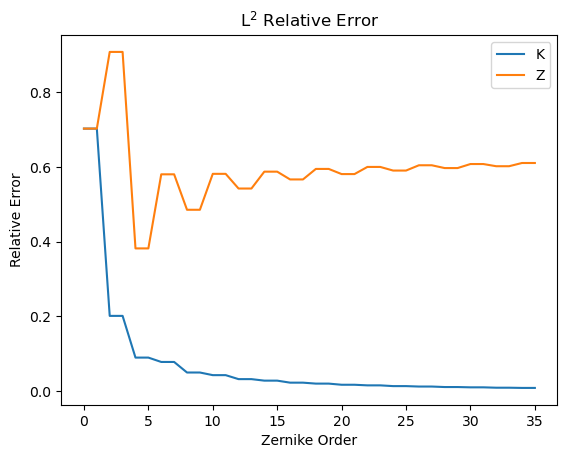

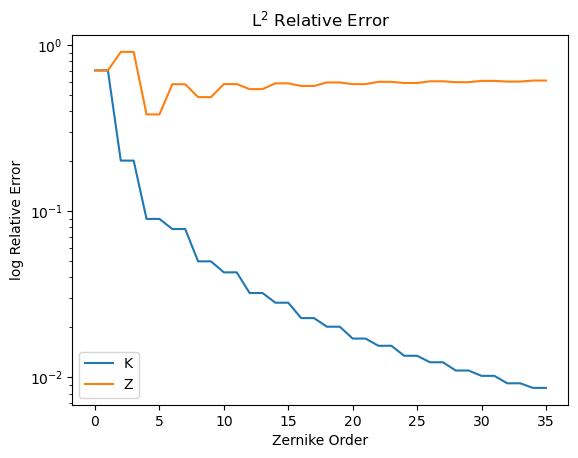

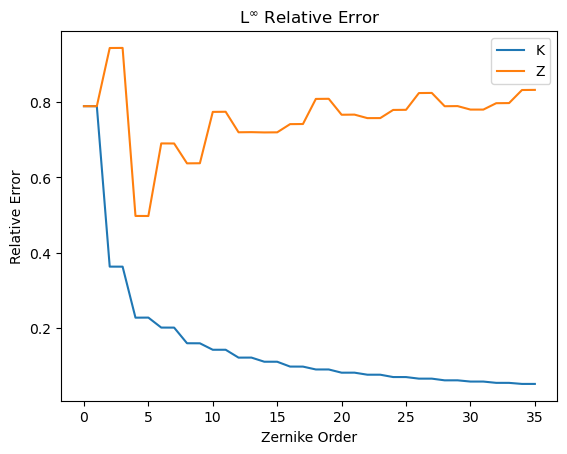

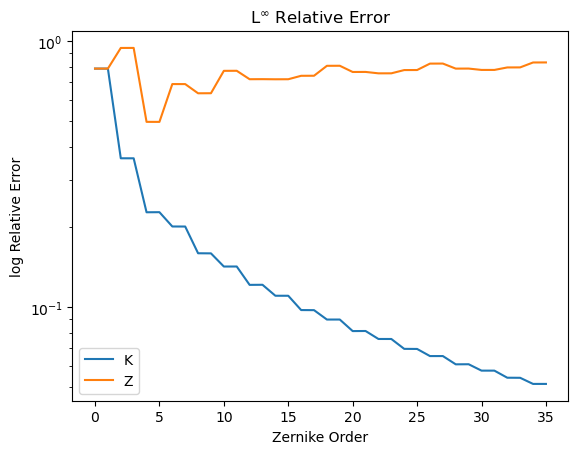

In [12]:
plot_errors("skewed_parabolic")

## Cos

### Normalizing Coefficient

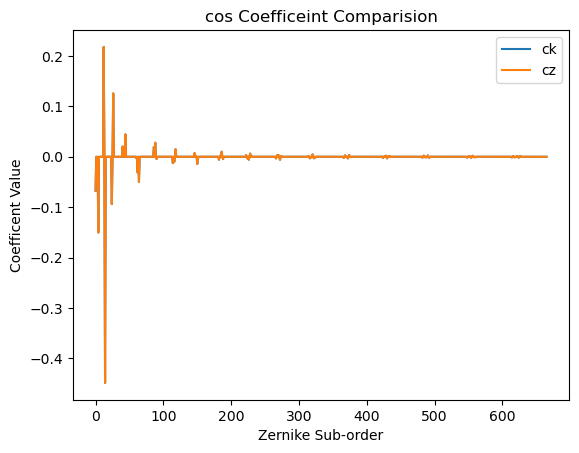

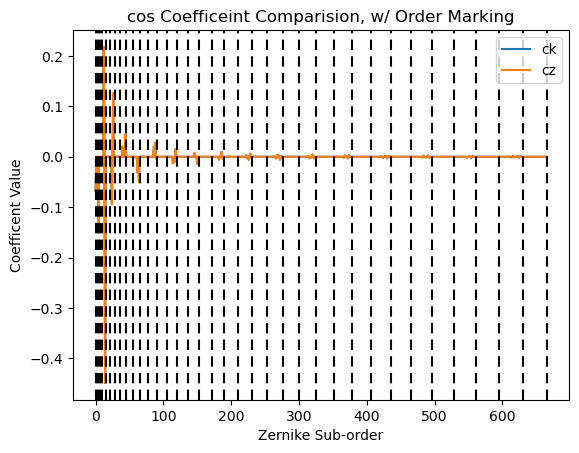

In [13]:
plot_cs("cos")

### Errors

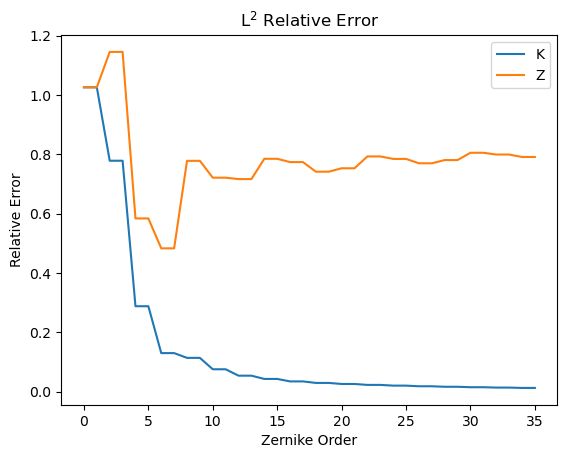

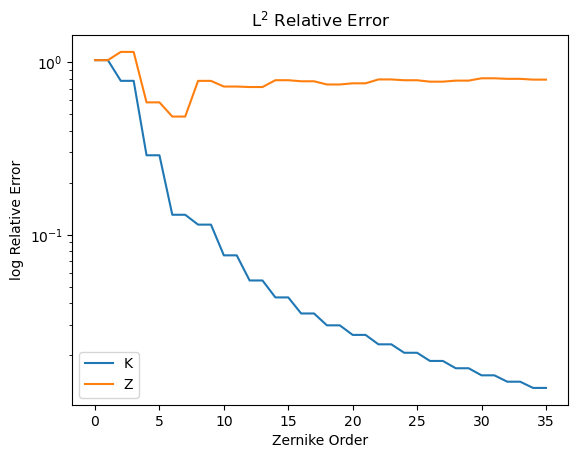

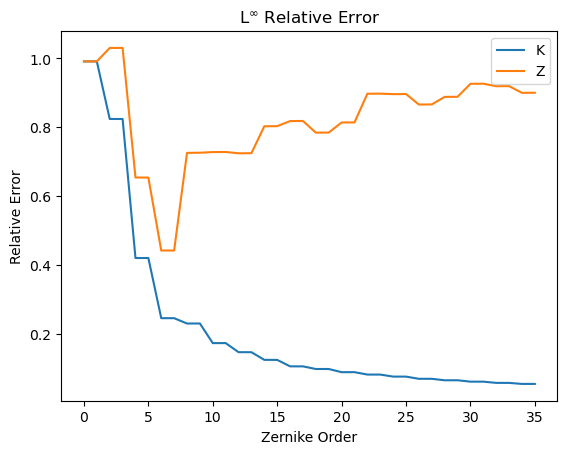

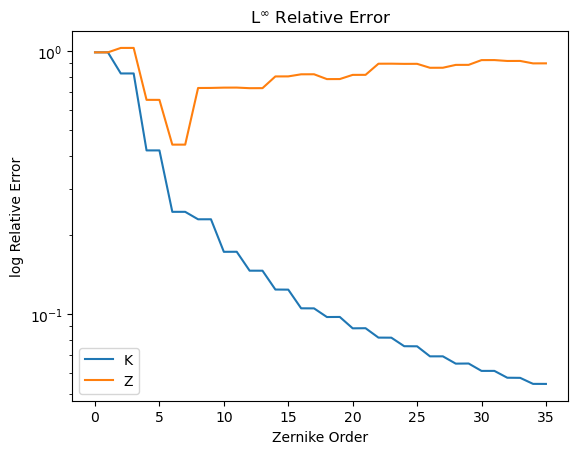

In [14]:
plot_errors("cos")

## Fast Cos

### Normalizing Coefficient

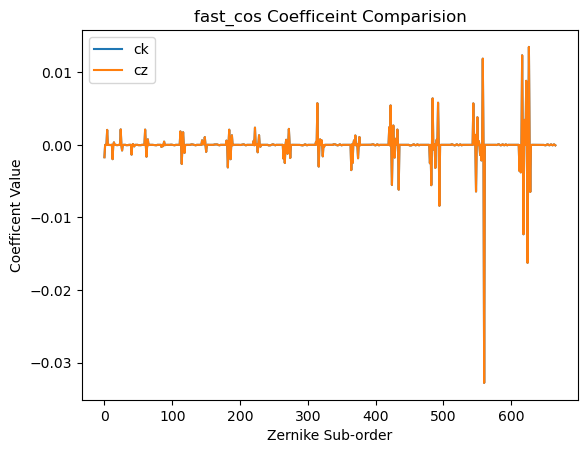

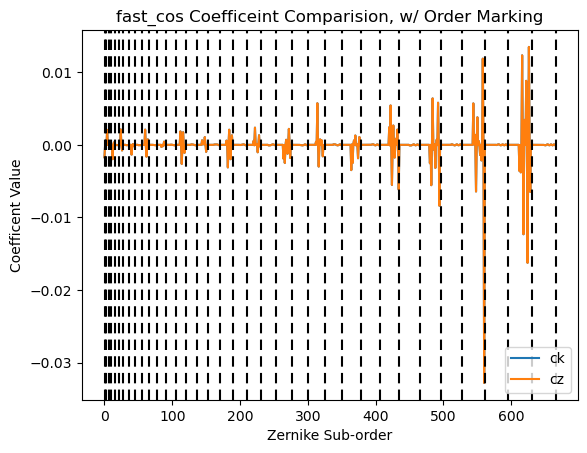

In [15]:
plot_cs("fast_cos")

### Errors

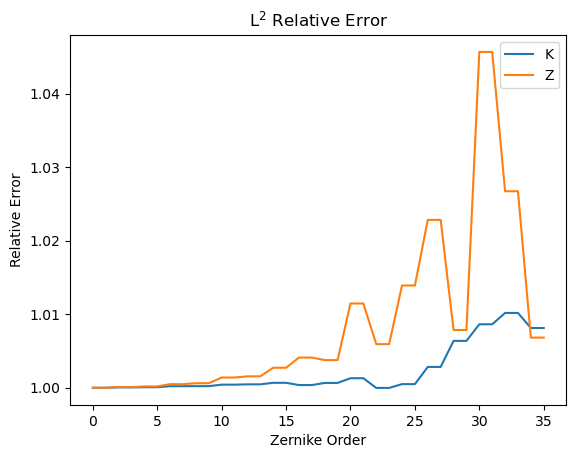

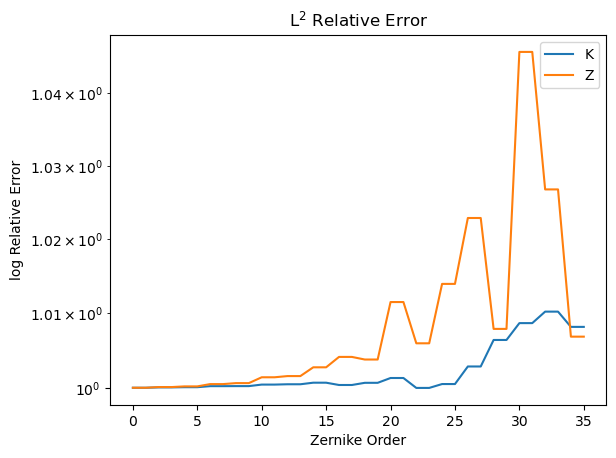

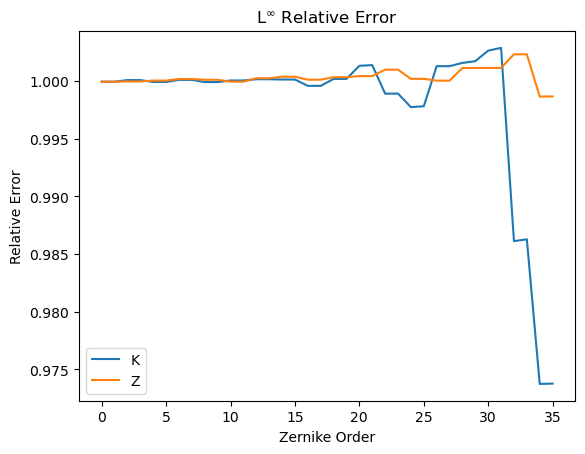

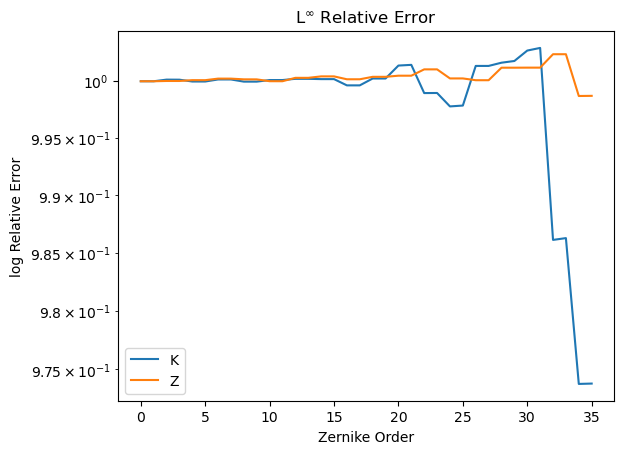

In [16]:
plot_errors("fast_cos")